## import libraries used for the project

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## load the dataset 

In [3]:
gold_data = pd.read_csv('gold_price.csv')
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
#top 5 values
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#botton 5 values
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#shape of the dataset
gold_data.shape

(2290, 6)

In [7]:
#info 
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


## clean the dataset

In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#to get statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [11]:
#drop unwanted columns
gold_data.drop('Date',axis=1,inplace=True)

In [12]:
gold_data

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [13]:
#check correlation between columns
correlation = gold_data.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

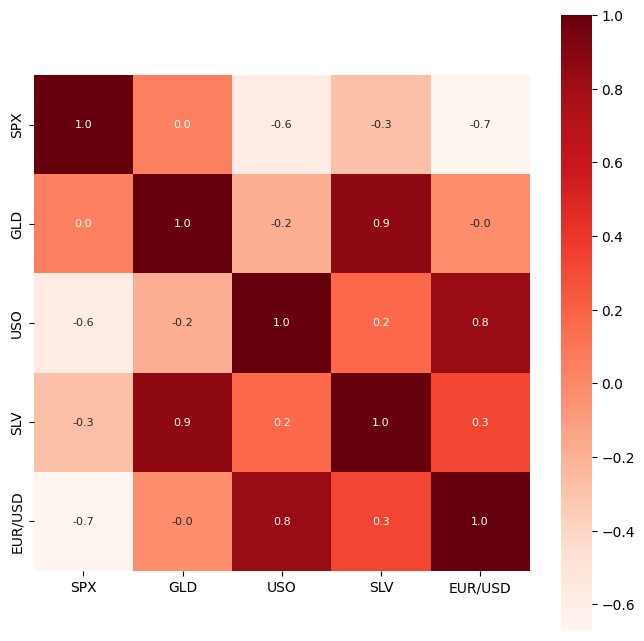

In [14]:
 # constructing a heatmap to understand the correlatiom
 plt.figure(figsize = (8,8))
 sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8}, cmap='Reds')

In [15]:
#check the correlation of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Mulavagila Hemasri\AppData\Local\Temp\ipykernel_23640\1088107769.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='red')


<Axes: xlabel='GLD', ylabel='Density'>

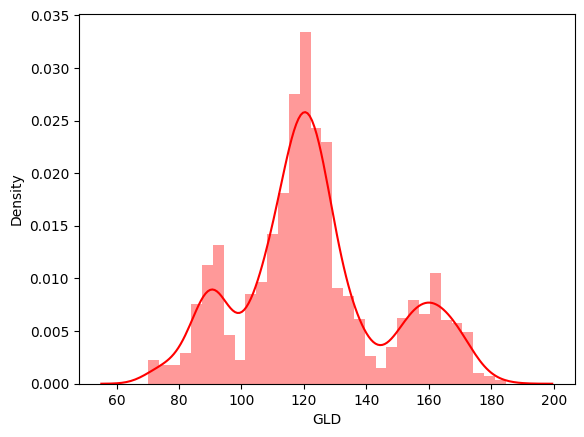

In [16]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='red')

## splitting the data

In [17]:
X = gold_data.drop('GLD',axis=1)
Y = gold_data['GLD']
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=42)

In [19]:
X_test

,SPX,USO,SLV,EUR/USD
2178,2602.419922,11.790000,16.080000,1.185396
1271,1752.069946,34.990002,21.870001,1.380396
1268,1744.660034,35.939999,21.410000,1.367596
44,1304.339966,83.889999,20.075001,1.538509
2025,2381.919922,11.170000,16.799999,1.053585
...,...,...,...,...
1872,2000.540039,11.190000,16.870001,1.101503
1075,1415.949951,32.169998,33.130001,1.295337
299,888.330017,33.380001,14.340000,1.400305
306,942.460022,37.689999,15.630000,1.397194


## train the model using random forest regressor

In [20]:
Regressor = RandomForestRegressor(n_estimators=100)
Regressor

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
#train the model
Regressor.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
#prediction on test data
test_data_prediction = Regressor.predict(X_test)
test_data_prediction

array([122.69849965, 130.5451031 , 127.5512999 ,  96.45849717,
       119.36930056, 114.33929926, 124.89980132, 117.69319923,
       108.00460136,  98.35159968,  95.36799944, 167.31159856,
       148.92030152, 116.26090083, 170.84090125,  85.29650001,
       123.09149874, 109.67979731, 113.09460133, 131.75290264,
       124.30739853, 113.52680082, 116.0842    , 108.81279997,
       108.69070141, 125.78959914, 119.01229962, 112.35419919,
       113.52400204, 125.3853987 , 146.22920156,  89.44349996,
       167.64739977, 113.7720999 , 108.41870113, 120.16670144,
       141.66649801, 161.33830149, 174.20419827, 153.33710165,
       119.79360107, 113.54610044, 121.34230002, 113.74799931,
       122.1911001 , 107.94390097,  88.04059893, 114.53649915,
       129.82380301, 117.80650141, 104.16860015, 129.81120322,
       107.24359816, 160.46080311, 131.67679985, 118.42269974,
       146.95840096, 135.90610169,  95.6615011 , 124.78760151,
       115.03109934,  86.12530087, 104.31489919, 114.06

In [23]:
 # R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9899063577581875


## train the model using linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr_model = LinearRegression()
lr_model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
#train the model
lr_model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
#prediction on test data
test_data_prediction = lr_model.predict(X_test)
test_data_prediction

array([122.51325689, 127.0907545 , 125.50313349, 104.54764991,
       124.90068634, 116.586858  , 123.04583828, 125.14446632,
       112.05259024, 104.88193814, 101.00127079, 157.04211875,
       137.50447931, 110.49031012, 160.83929478,  88.48009266,
       117.77776928, 118.96072884, 121.53807068, 128.1487556 ,
       118.02290942, 116.08975575, 109.6315024 , 103.05777279,
       111.84096218, 120.86033322, 119.62399827, 112.20020453,
       109.19479998, 119.62171119, 196.11502374,  99.10085802,
       157.19764615, 122.07046494, 113.39777112, 123.34726222,
       132.36268845, 152.08038513, 176.64473496, 145.03588282,
       124.05185863, 121.33549213, 122.74098458, 115.57613444,
       122.35927588, 112.09083408,  93.45476082, 116.93571065,
       126.42056988, 118.08975012, 105.4726357 , 126.56933728,
       105.64602965, 151.78330086, 137.80329213, 117.39236458,
       159.54433502, 126.41884417, 100.17367568, 122.74815137,
       109.79583313,  86.2818531 , 113.37269965, 120.30

In [28]:
 # R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8975640982991402


# conclusion: we trained using linear regession and random forest ,
# based on r squared error random forest algorithm is performing better 
# compared to linear regression

In [29]:
Y_test = list( Y_test)

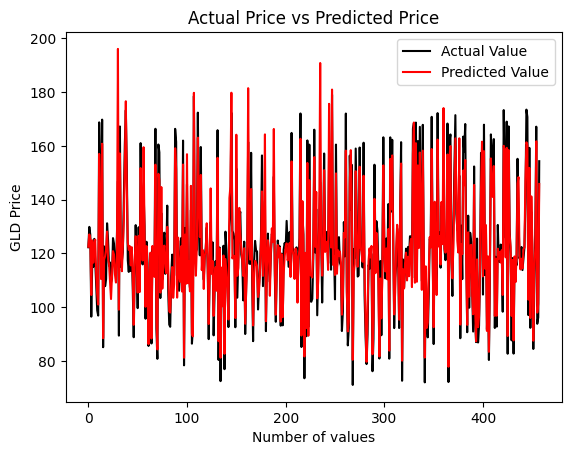

In [30]:
plt.plot(Y_test, color='black', label = 'Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [32]:
import pickle
pickle.dump(Regressor, open("gold_model.pkl", "wb"))